In [1]:

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from scipy import stats as sps
from scipy.interpolate import interp1d

from IPython.display import clear_output

FILTERED_REGIONS = [
    'Virgin Islands',
    'American Samoa',
    'Northern Mariana Islands',
    'Guam',
    'Puerto Rico']

FILTERED_REGION_CODES = ['AS', 'GU', 'PR', 'VI', 'MP']

%config InlineBackend.figure_format = 'retina'

### Standings

In [2]:

# As of 4/12
no_lockdown = [
    'North Dakota', 'ND',
    'South Dakota', 'SD',
    'Nebraska', 'NB',
    'Iowa', 'IA',
    'Arkansas','AR'
]
partial_lockdown = [
    'Utah', 'UT',
    'Wyoming', 'WY',
    'Oklahoma', 'OK',
    'Massachusetts', 'MA'
]

FULL_COLOR = [.7, .7, .7]
NONE_COLOR = [179/255, 35/255, 14/255]
PARTIAL_COLOR = [.5, .5, .5]
ERROR_BAR_COLOR = [.3, .3, .3]

In [52]:

from matplotlib.colors import ListedColormap
import numpy as np
import math

# Colors
NONE = [0, 1, 0]
MIDDLE = [0.9, 0.9, 0.9]
MUCH = [1, 0, 0]
intervention_count_df = s.load_object('intervention_count_df')
position_list = [i for i in range(1, intervention_count_df.intervention_index.max()+1)]
half_count = math.ceil(len(position_list)/2)
cmap = ListedColormap(np.r_[
    np.linspace(NONE, MIDDLE, half_count),
    np.linspace(MIDDLE, MUCH, half_count)
])
state_abbreviation_dict = s.load_object('state_abbreviation_dict')
state_abbreviation_dict = {value: key for key, value in state_abbreviation_dict.items()}

In [63]:

import re
%run ../../load_magic/storage.py
s = Storage()

final_results = s.load_object('final_results')
filtered = final_results.index.get_level_values(0).isin(FILTERED_REGIONS)
mr = final_results.loc[~filtered].groupby(level=0)[['ML', 'High_90', 'Low_90']].last()

def plot_standings(mr, figsize=None, title=None):
    if not figsize:
        figsize = ((15.9/50)*len(mr)+.1, 2.5)
        
    fig, ax = plt.subplots(figsize=figsize)
    
    if title is None:
        title = f"Most Recent $R_t$ by State as of {final_results.index[-1][1].strftime('%B %d')}"
    ax.set_title(title)
    err = mr[['Low_90', 'High_90']].sub(mr['ML'], axis=0).abs()
    bars = ax.bar(mr.index,
                  mr['ML'],
                  width=.825,
                  color=FULL_COLOR,
                  ecolor=ERROR_BAR_COLOR,
                  capsize=2,
                  error_kw={'alpha':.5, 'lw':1},
                  yerr=err.values.T)

    for bar, state_name in zip(bars, mr.index):
        mask_series = (intervention_count_df.index == state_abbreviation_dict[state_name])
        intervention_index_series = intervention_count_df[mask_series].intervention_index
        if intervention_index_series.shape[0] == 1:
            intervention_index = intervention_index_series.squeeze()
        else:
            intervention_index = 0
        bar.set_color(cmap.colors[intervention_index-1])

    labels = mr.index.to_series().replace({'District of Columbia':'DC'})
    ax.set_xticklabels(labels, rotation=90, fontsize=11)
    ax.margins(0)
    ax.set_ylim(0, 3.)
    ax.axhline(1.0, linestyle=':', color='k', lw=1)

    leg = ax.legend(handles=[
                        Patch(label='Much', color=cmap.colors[len(position_list)]),
                        Patch(label='Little', color=cmap.colors[half_count]),
                        Patch(label='Very Little', color=cmap.colors[0])
                    ],
                    title='Government Interventions',
                    ncol=3,
                    loc='upper left',
                    columnspacing=.75,
                    handletextpad=.5,
                    handlelength=1)
    
    leg._legend_box.align = "left"
    fig.set_facecolor('w')
    file_name = re.sub('[^A-Za-z]+', ' ', title).strip().replace(' ', '_')
    save_fig_as_various(fig, file_name, verbose=True)
    
    return fig, ax

Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\pgf\Most_Recent_R_t_by_State_as_of_July.pgf
Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\png\Most_Recent_R_t_by_State_as_of_July.png
Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\svg\Most_Recent_R_t_by_State_as_of_July.svg


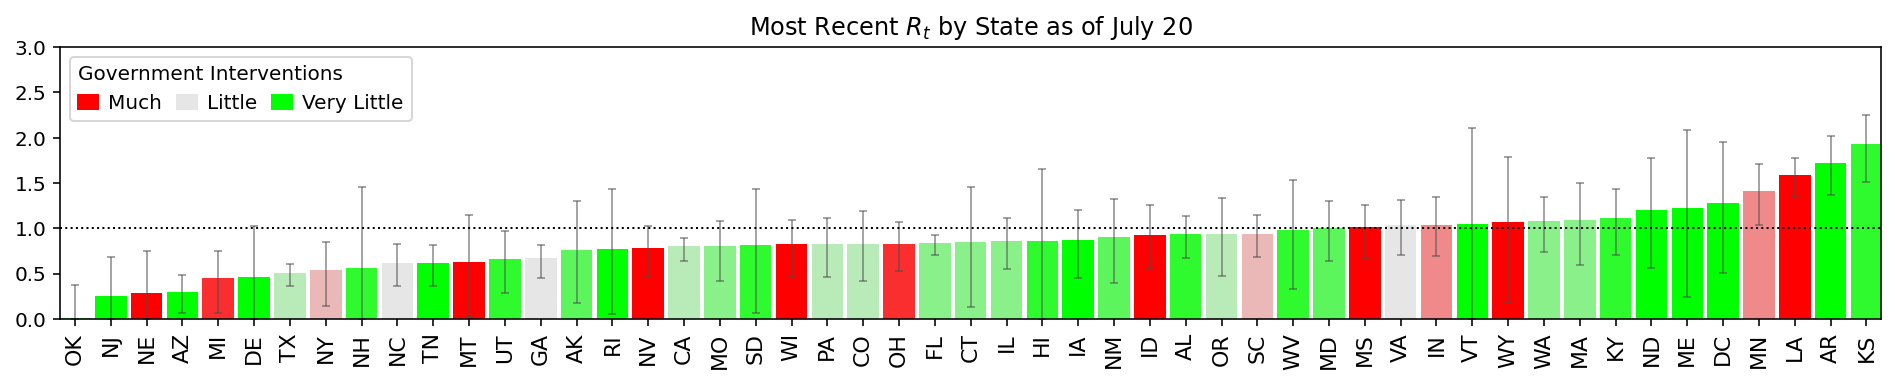

In [64]:

%run ../../load_magic/charts.py
mr.sort_values(['ML', 'High_90'], inplace=True)
plot_standings(mr, title='Most Recent $R_t$ by State as of {}'.format(final_results.index[-1][1].strftime('%B %d')));

Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\pgf\Most_Recent_R_t_by_State.pgf
Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\png\Most_Recent_R_t_by_State.png
Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\svg\Most_Recent_R_t_by_State.svg


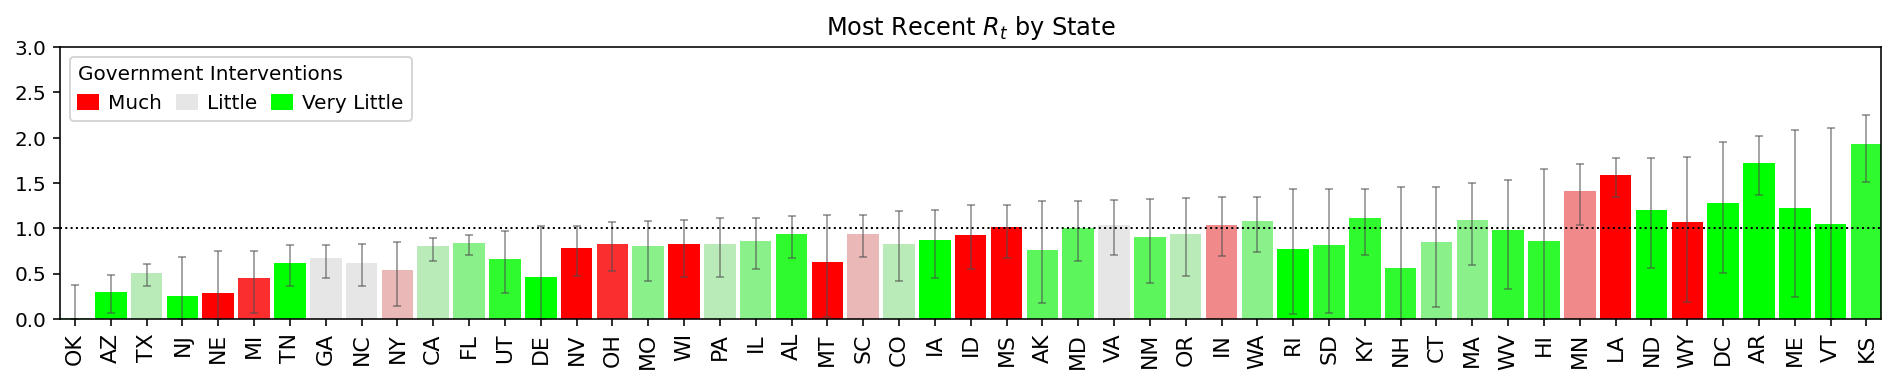

In [60]:

mr.sort_values(['High_90', 'ML'], inplace=True)
plot_standings(mr);

Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\pgf\Most_Recent_R_t_by_State.pgf
Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\png\Most_Recent_R_t_by_State.png
Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\svg\Most_Recent_R_t_by_State.svg


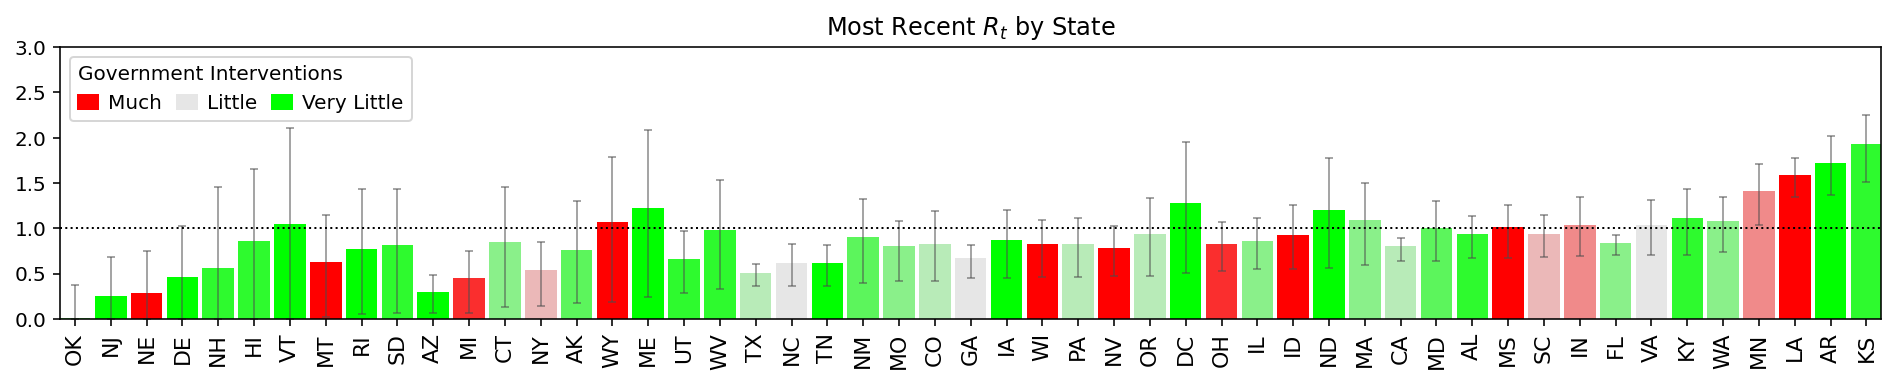

In [61]:

mr.sort_values(['Low_90', 'ML'], inplace=True)
plot_standings(mr);

Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\pgf\Likely_Under_Control_as_of_July.pgf
Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\png\Likely_Under_Control_as_of_July.png
Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\svg\Likely_Under_Control_as_of_July.svg


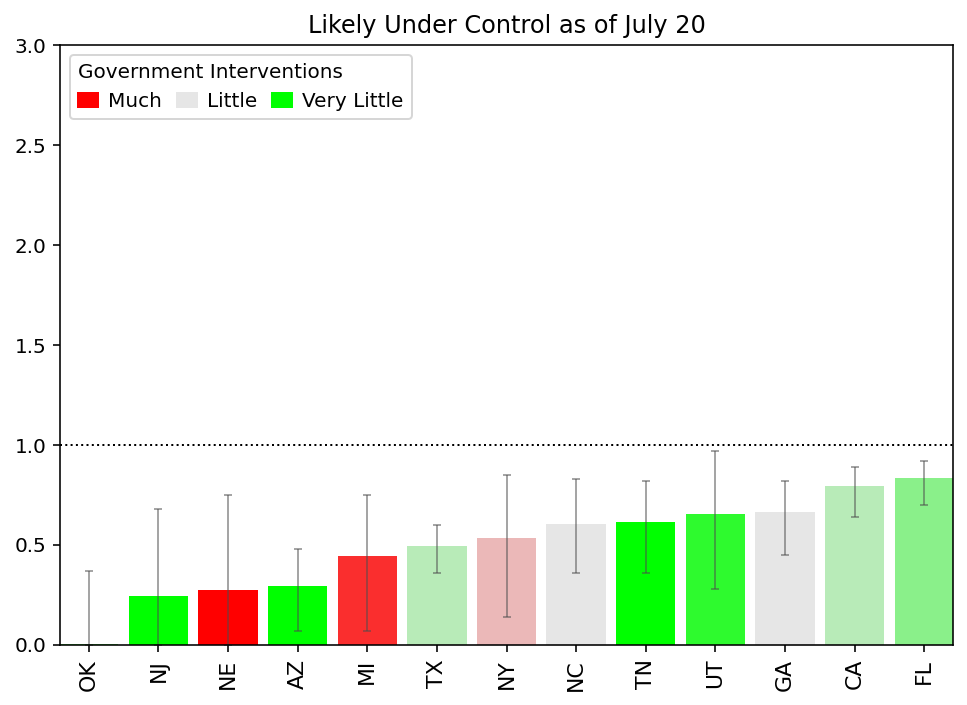

In [65]:

show = mr[mr.High_90.le(1)].sort_values('ML')
fig, ax = plot_standings(show, figsize=(8, 377*8/547),
                         title='Likely Under Control as of {}'.format(final_results.index[-1][1].strftime('%B %d')))
#ax.get_legend().remove()

Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\pgf\Likely_Not_Under_Control.pgf
Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\png\Likely_Not_Under_Control.png
Saving plot to D:\Documents\Repositories\notebooks\covid19\saves\svg\Likely_Not_Under_Control.svg


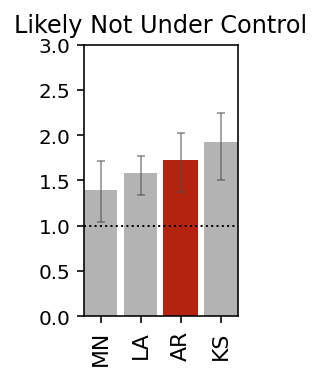

In [8]:

show = mr[mr.Low_90.ge(1.0)].sort_values('Low_90')
fig, ax = plot_standings(show, title='Likely Not Under Control');
ax.get_legend().remove()